<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Разведочный-анализ-данных" data-toc-modified-id="Разведочный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Разведочный анализ данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных-и-библиотек" data-toc-modified-id="Импорт-данных-и-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных и библиотек</a></span></li><li><span><a href="#Первичный-осмотр-данных" data-toc-modified-id="Первичный-осмотр-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Первичный осмотр данных</a></span><ul class="toc-item"><li><span><a href="#Дуга" data-toc-modified-id="Дуга-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Дуга</a></span></li><li><span><a href="#Сыпучие-материалы" data-toc-modified-id="Сыпучие-материалы-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Сыпучие материалы</a></span></li><li><span><a href="#Газ" data-toc-modified-id="Газ-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Газ</a></span></li><li><span><a href="#Температура" data-toc-modified-id="Температура-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Температура</a></span></li><li><span><a href="#Проволока" data-toc-modified-id="Проволока-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Проволока</a></span></li></ul></li><li><span><a href="#Промежуточные-выводы" data-toc-modified-id="Промежуточные-выводы-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Промежуточные выводы</a></span></li></ul></li><li><span><a href="#План-дальнейших-действий" data-toc-modified-id="План-дальнейших-действий-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>План дальнейших действий</a></span></li></ul></div>

# Предсказание температуры стали

**Задание**  
Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

**Цель работы**  
Создать модель, которая, принимая на вход известные параметры (или их прогнозные значения), будет предсказывать температуру стали после осуществления операций с прогнозными параметрами.  

## Разведочный анализ данных

### Импорт данных и библиотек

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
alt_path = '/datasets/'

try:
    df_arc = pd.read_csv('data_arc_new.csv')
    df_bulk = pd.read_csv('data_bulk_new.csv')
    df_bulk_time = pd.read_csv('data_bulk_time_new.csv')
    df_gas = pd.read_csv('data_gas_new.csv')
    df_temp = pd.read_csv('data_temp_new.csv')
    df_wire = pd.read_csv('data_wire_new.csv')
    df_wire_time = pd.read_csv('data_wire_time_new.csv')
    
except FileNotFoundError:
    df_arc = pd.read_csv(alt_path + 'data_arc_new.csv')
    df_bulk = pd.read_csv(alt_path + 'data_bulk_new.csv')
    df_bulk_time = pd.read_csv(alt_path + 'data_bulk_time_new.csv')
    df_gas = pd.read_csv(alt_path + 'data_gas_new.csv')
    df_temp = pd.read_csv(alt_path + 'data_temp_new.csv')
    df_wire = pd.read_csv(alt_path + 'data_wire_new.csv')
    df_wire_time = pd.read_csv(alt_path + 'data_wire_time_new.csv')

### Первичный осмотр данных

Пройдем по всем датасетам и посмотрим на хранящиеся данные и распределения.

#### Дуга

In [3]:
df_arc.head()

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691


In [4]:
df_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
df_arc.describe()

,key,Активная мощность,Реактивная мощность
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


В реактивную мощность закралось какое-то ошибочное отрицательное значение, которое не позволит построить графики, уберем его.

In [6]:
df_arc['Реактивная мощность'] = df_arc['Реактивная мощность'].apply(lambda item: 0 if item < 0 else item)

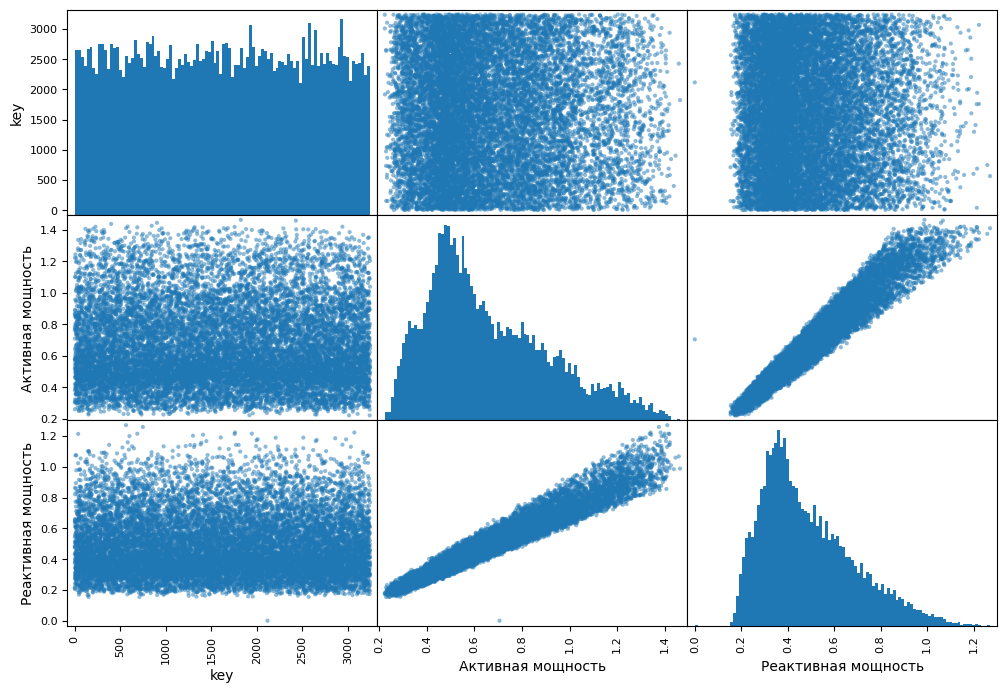

In [7]:
pd.plotting.scatter_matrix(df_arc, figsize=(12, 8), hist_kwds={'bins':100});

Наблюдения:
* По активной и реактивной мощности гистограммы ожидаемо Гауссовы, со смещением вправо
* Между активной и реактивной мощностью видна явная корреляция, стоит проверить их на коллинеарность.

In [8]:
df_arc.corr()

,key,Активная мощность,Реактивная мощность
key,1.000000,-0.010220,-0.013255
Активная мощность,-0.010220,1.000000,0.966148
Реактивная мощность,-0.013255,0.966148,1.000000


Так и есть, коэффициент Пирсона между ними ~0.97, величины коллинеарны. Буду иметь в виду.

#### Сыпучие материалы

In [9]:
df_bulk.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [10]:
df_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [11]:
df_bulk.describe()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 49.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 49.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 49.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


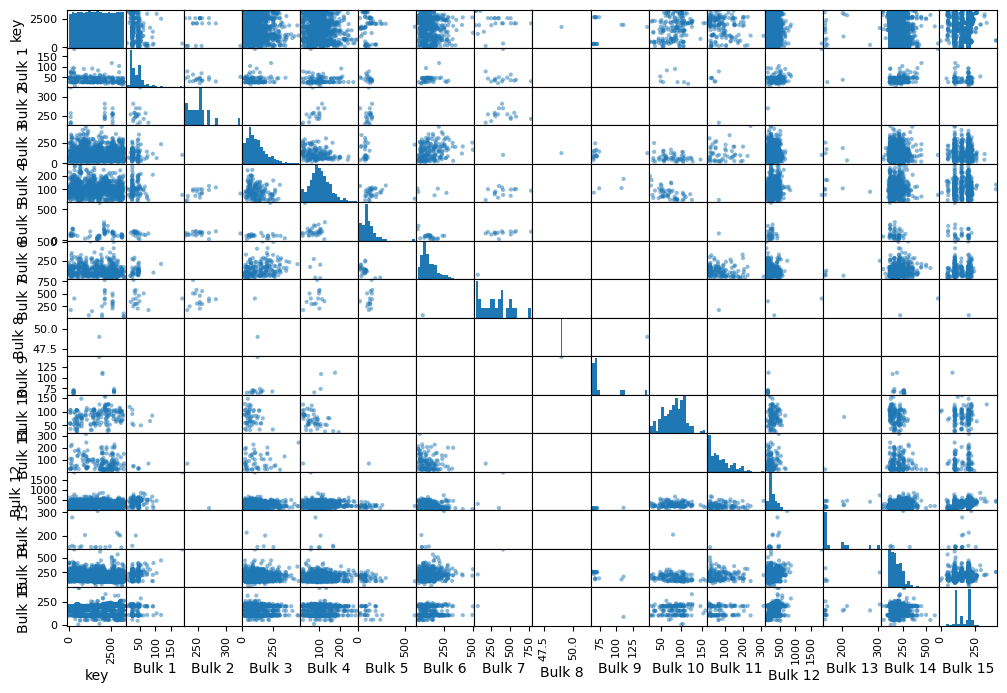

In [12]:
pd.plotting.scatter_matrix(df_bulk, figsize=(12, 8), hist_kwds={'bins':20});

Наблюдения:
* Точек не так много, особенно относительно количества точек в других датасетах
* Пропуски считаются отстутствием подачи сыпучих материалов, т.е. нулями
* По многим столбцам количество точек недостаточно для построения гисторграмм, но там, где достаточно, они имеют ожидаемую Гауссову форму.

In [13]:
df_bulk_time.head()

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47


In [14]:
df_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


Наблюдения
* Количество точек в точности совпадает с оным в датафрейме с объемами сыпучих материалов
* Строить гистограммы и кроссплоты здесь бессмысленно ввиду сущности данных (кроссплот времени никакой информации в себе не несет)
* Здесь указан только одна точка во времени, что скорее всего, сводит к нулю ценность этих данных. Если бы на каждую партию было по две точки времени (скажем, начало и конец подачи), то из них можно было бы извлечь дельту времени и использовать ее как признак в дальнейшем.

#### Газ

In [15]:
df_gas.head()

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692


In [16]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [17]:
df_gas.describe()

,key,Газ 1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


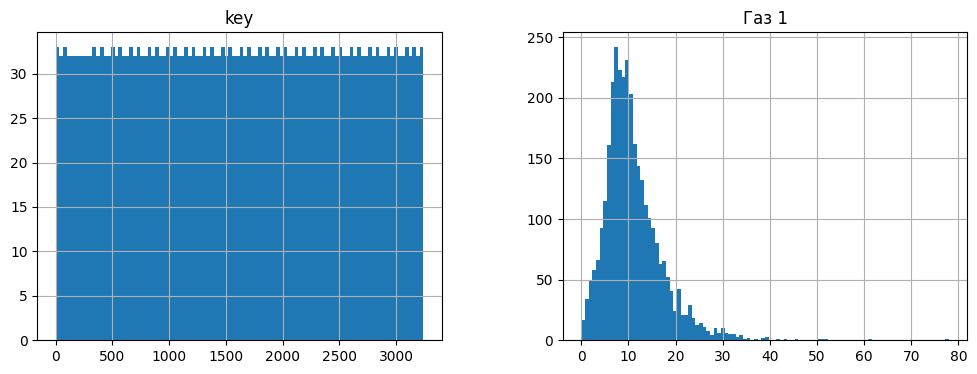

In [18]:
df_gas.hist(bins=100, figsize=(12, 4));

Наблюдения:
* Распределение ожидаемо Гауссово со смещением вправо и длинным хвостом
* Длинный хвост говорит о вероятном наличии аномальных значений, в дальнейшем их нужно будет обработать.

#### Температура

In [19]:
df_temp.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [20]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   Время замера  18092 non-null  object 
 2   Температура   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [21]:
df_temp.describe()

,key,Температура
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


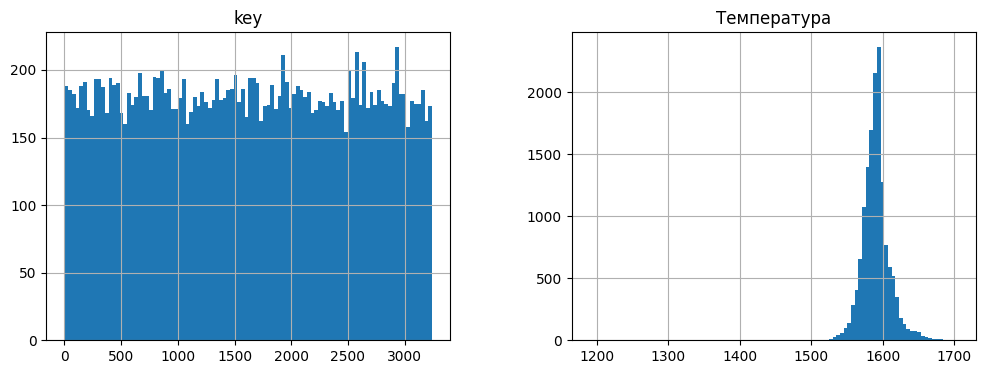

In [22]:
df_temp.hist(bins=100, figsize=(12, 4));

Наблюдения:
* Данные представлены в виде нескольких замеров во времени для каждой партии.
* Можно извлечь целевой признак и предиктор - температуру в конце партии и в начале соответсвенно.
* Видны длинные хвосты с обоих сторон гистограммы (особенно, справа), эти аномальные значения стоит убрать в дальнейшем.

#### Проволока

In [23]:
df_wire.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Все те же вопросы, что и к bulk

In [24]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [25]:
df_wire.describe()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442841,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 15.132 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 15.132 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/metal_undivided/anaconda3/envs/practicum/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 15.132 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


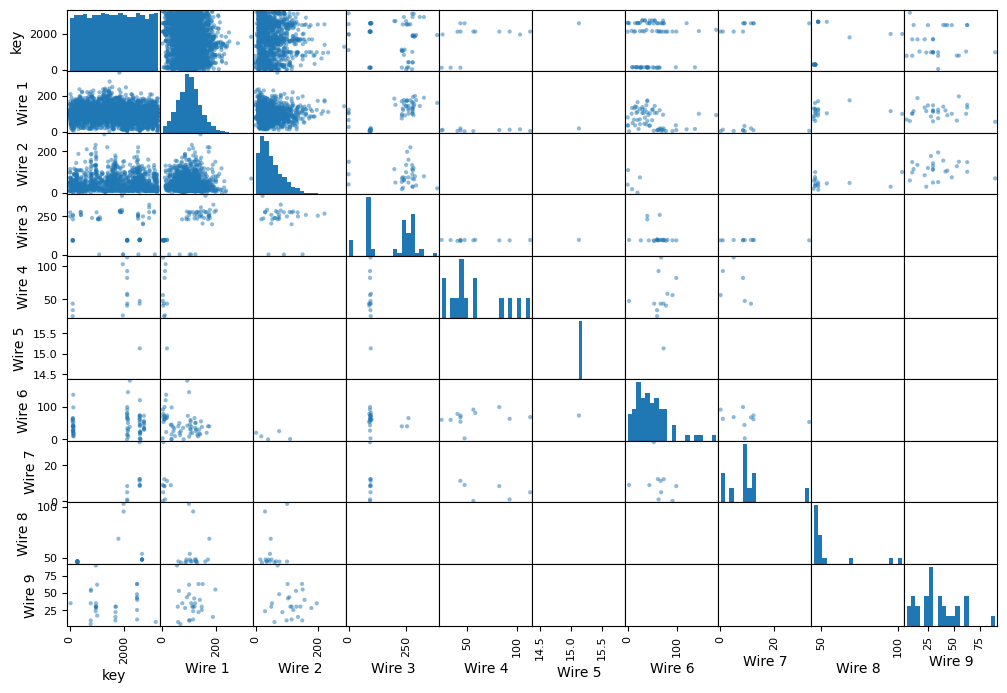

In [26]:
pd.plotting.scatter_matrix(df_wire, figsize=(12, 8), hist_kwds={'bins':20});

Пара кроссплотов выглядят несколько подозрительно (например, wire 4 и wire 6). На всякий случай проверим их на коллинеарность.

In [27]:
df_wire.corr()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
key,1.000000,-0.083352,-0.005461,-0.084460,0.389064,NaN,0.082274,0.578898,0.323891,-0.012200
Wire 1,-0.083352,1.000000,-0.030892,0.724370,0.054001,NaN,-0.280807,-0.035072,0.068697,0.010104
Wire 2,-0.005461,-0.030892,1.000000,-0.081852,NaN,NaN,-0.265706,NaN,0.250477,0.011019
Wire 3,-0.084460,0.724370,-0.081852,1.000000,0.069854,NaN,-0.221602,-0.056948,NaN,NaN
Wire 4,0.389064,0.054001,NaN,0.069854,1.000000,NaN,0.237456,-0.404865,NaN,NaN
Wire 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wire 6,0.082274,-0.280807,-0.265706,-0.221602,0.237456,NaN,1.000000,-0.224093,NaN,NaN
Wire 7,0.578898,-0.035072,NaN,-0.056948,-0.404865,NaN,-0.224093,1.000000,NaN,NaN
Wire 8,0.323891,0.068697,0.250477,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Wire 9,-0.012200,0.010104,0.011019,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


Коллинеарности нет.

Наблюдения:
* Аналогичны оным для сыпучих материалов.

In [28]:
df_wire_time.head()

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


Здесь картина тоже полностью аналогична сыпучим материалам.

### Промежуточные выводы

* Данные представлены в достаточном объеме, качество данных в целом хорошее
* Большинство величин имеют ожидаемые Гауссовы распределения
* Замечена коллинеарность между реактивной и активной мощностью нагревательной дуги
* В нескольких датасетах замечены аномальные значения, они будут обработаны в дальнейшем

## План дальнейших действий

1. Провести предобработку данных: отсеить аномальные значения, заполнить пропуски и пр.
2. Выделить целевой признак (температура стали на выходе), выделить предикторы (температура на входе, время нагрева и т.д) и собрать из них общий датасет. Данные разделить на обучающую и тестовую выборки для обучения моделей.
3. Попробовать несколько вариантов моделей, подобрать для них оптимальные гиперпараметры, выбрать модель, дающую наибольшую точность на валидации.
4. Протестировать выбранную модель на тестовой выборке, провести анализ важности признаков.
5. Сделать выводы о проделанной работе.

На все интересующие вопросы были получены исчерпывающие ответы во время вебинара, поэтому на данный момент **вопросов нет**.